In [17]:
import numpy as np
import csv

# to add files
from google.colab import files

# the object "uploaded_dict" is a dictionary of all files uploaded, keyed by filename
uploaded_dict = files.upload()

for fn in uploaded_dict.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded_dict[fn])))
  

Saving UAExtendedData.csv to UAExtendedData (1).csv
User uploaded file "UAExtendedData.csv" with length 353767 bytes


In [18]:
for key, val in uploaded_dict.items():
  print(key)
  print(val)

f = open('UAExtendedData.csv', "rt", encoding='ascii')


  


UAExtendedData.csv
b'32.2337934,-110.9547958,3\r\n32.2303972,-110.9567222,3\r\n32.2290578,-110.9594937,3\r\n32.2396061,-110.9497596,3\r\n32.2326679,-110.954738,3\r\n32.2278581,-110.9437983,6\r\n32.2335467,-110.9466309,3\r\n32.2338271,-110.9523318,3\r\n32.2348496,-110.9494037,3\r\n32.2515301,-110.9291951,6\r\n32.2316597,-110.9625473,6\r\n32.2300582,-110.9532406,3\r\n32.2290737,-110.9594785,3\r\n32.2290578,-110.9594785,3\r\n32.234568,-110.9478472,3\r\n32.2286339,-110.9529183,6\r\n32.2304092,-110.9594033,3\r\n32.234878,-110.9452476,6\r\n32.227765,-110.9579086,6\r\n32.2303718,-110.9578983,1\r\n32.2317166,-110.9488632,3\r\n32.2337718,-110.9494026,3\r\n32.2290578,-110.9594785,3\r\n32.234865,-110.9458568,6\r\n32.234878,-110.9452476,3\r\n32.2316756,-110.9625475,3\r\n32.2348654,-110.9494168,3\r\n32.2277491,-110.9578955,3\r\n32.2277878,-110.9510106,3\r\n32.2359419,-110.9567609,3\r\n32.2348748,-110.9467358,3\r\n32.2396402,-110.9482717,3\r\n32.227765,-110.9579086,3\r\n32.2290737,-110.9594785,3\r\n

In [19]:
col_index_max = 140
row_index_max = 97
grid = np.zeros((row_index_max,col_index_max))
list = [['31.65', '-109.62', '3'],['31.23', '-109.62', '4'],['31.76', '-109.22', '2'],['32', '-110', '1']]

corner_lat = 32.25
corner_long = -110.969
resolution_lat = .0003
resolution_long = .0003
max_weight = 130.0


csv_reader = csv.reader(f, delimiter=',')

print(csv_reader)

for row in csv_reader:
  
  r = np.int_(np.round(np.absolute((np.float32(row[0]) - corner_lat) / resolution_lat)))
  c = np.int_(np.round(np.absolute((np.float32(row[1]) - corner_long) / resolution_long)))
  # check for r and c greater than = 0 and less than = max index - 1
  # below adds the weight in a plus shape directly around the rounded 
  if r >= 0 and r < row_index_max and c >= 0 and c < col_index_max:
    grid[r,c] += np.float32(row[2])
    if grid[r,c] > max_weight:
      grid[r,c] = max_weight
    # points up down left right of crime spot
    r += 1
    if r >= 0 and r < row_index_max:
      grid[r,c] += np.float32(row[2]) / 1.5
      if grid[r,c] > max_weight:
        grid[r,c] = max_weight
    r -= 1
    c += 1
    if c >= 0 and c < col_index_max:
      grid[r,c] += np.float32(row[2]) / 1.5
      if grid[r,c] > max_weight:
        grid[r,c] = max_weight  
    c -= 1
    r -=1
    if r >= 0 and r < row_index_max:
      grid[r,c] += np.float32(row[2]) / 1.5
      if grid[r,c] > max_weight:
        grid[r,c] = max_weight
    r += 1
    c -= 1
    if c >= 0 and c < col_index_max:
      grid[r,c] += np.float32(row[2]) / 1.5
      if grid[r,c] > max_weight:
        grid[r,c] = max_weight
      
    # points diag
    r += 1
    if r >= 0 and r < row_index_max and c >= 0 and c < col_index_max:
      grid[r,c] += np.float32(row[2]) / 2
      if grid[r,c] > max_weight:
        grid[r,c] = max_weight
    c += 2
    if r >= 0 and r < row_index_max and c >= 0 and c < col_index_max:
      grid[r,c] += np.float32(row[2]) / 2
      if grid[r,c] > max_weight:
        grid[r,c] = max_weight
    r -= 2
    if r >= 0 and r < row_index_max and c >= 0 and c < col_index_max:
      grid[r,c] += np.float32(row[2]) / 2
      if grid[r,c] > max_weight:
        grid[r,c] = max_weight
    c -= 2
    if r >= 0 and r < row_index_max and c >= 0 and c < col_index_max:
      grid[r,c] += np.float32(row[2]) / 2
      if grid[r,c] > max_weight:
        grid[r,c] = max_weight
    
print(grid)


[[  0.           0.           0.         ...  66.66666667  50.
    0.        ]
 [  0.           0.           5.5        ... 100.          66.66666667
    0.        ]
 [  0.           1.5          9.33333333 ...  66.66666667  50.
    0.        ]
 ...
 [130.         130.         130.         ...   6.5          8.66666667
    6.5       ]
 [ 85.         125.66666667 130.         ...  10.66666667  14.5
    8.66666667]
 [100.         130.         120.33333333 ...   9.5         10.66666667
    6.5       ]]


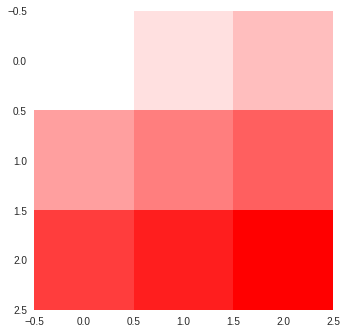

In [20]:
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap


colors = [(1, 1, 1), (1, 0, 0)]  
cmap_name = 'n'
cm = LinearSegmentedColormap.from_list(
        cmap_name, colors, N=100)


d = [[1, 2, 3],[4, 5, 6],[7, 8, 9]]
ax = plt.gca()
ax.grid(False)
im = ax.imshow(d, cmap=cm)




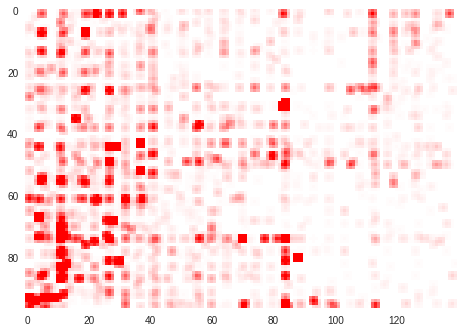

In [21]:
import matplotlib.pyplot as plt

d = [[1, 2, 3],[4, 5, 6],[7, 8, 9]]
ax = plt.gca()
im = ax.imshow(grid, cmap = cm)

ax.grid(False)

plt.savefig("heatmap.png", dpi=500, quality = 95, facecolor='w', edgecolor='w',
        orientation='landscape', papertype=None, format=None,
        transparent=True, bbox_inches=None, pad_inches=0.1,
        frameon=None, metadata=None)
files.download("heatmap.png")

In [22]:
import json

d = []

for i in range(len(grid)):
  for j in range(len(grid[0])):
    d += [[corner_lat - i*resolution_lat, corner_long + j*resolution_long, grid[i][j]]]

print(d)    

with open("uaextendeddata.json", "w") as outfile:
    json.dump({"data": d}, outfile, indent = 4)
    
files.download("uaextendeddata.json")

[[32.25, -110.969, 0.0], [32.25, -110.9687, 0.0], [32.25, -110.96839999999999, 0.0], [32.25, -110.96809999999999, 0.0], [32.25, -110.9678, 48.0], [32.25, -110.9675, 64.0], [32.25, -110.96719999999999, 48.0], [32.25, -110.9669, 0.0], [32.25, -110.9666, 0.0], [32.25, -110.96629999999999, 0.0], [32.25, -110.966, 3.0], [32.25, -110.9657, 43.0], [32.25, -110.96539999999999, 55.00000000000001], [32.25, -110.96509999999999, 40.5], [32.25, -110.9648, 2.0], [32.25, -110.9645, 4.5], [32.25, -110.96419999999999, 4.0], [32.25, -110.9639, 4.0], [32.25, -110.9636, 52.33333333333333], [32.25, -110.96329999999999, 69.50000000000003], [32.25, -110.963, 71.16666666666666], [32.25, -110.9627, 61.0], [32.25, -110.96239999999999, 130.0], [32.25, -110.96209999999999, 130.0], [32.25, -110.9618, 90.66666666666666], [32.25, -110.9615, 3.5], [32.25, -110.96119999999999, 80.0], [32.25, -110.9609, 107.66666666666669], [32.25, -110.9606, 81.33333333333333], [32.25, -110.96029999999999, 1.0], [32.25, -110.96, 76.0]

Simplified Code for Street Light Dataset

In [23]:
import numpy as np
import csv

# to add files
from google.colab import files

# the object "uploaded_dict" is a dictionary of all files uploaded, keyed by filename
uploaded_dict = files.upload()

for fn in uploaded_dict.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded_dict[fn])))

Saving LightData.csv to LightData (2).csv
User uploaded file "LightData.csv" with length 521442 bytes


In [24]:
for key, val in uploaded_dict.items():
  print(key)
  print(val)

f = open('LightData.csv', "rt", encoding='ascii')

col_index_max = 140
row_index_max = 97
grid1 = np.zeros((row_index_max,col_index_max))

corner_lat = 32.25
corner_long = -110.969
resolution_lat = .0003
resolution_long = .0003

csv_reader = csv.reader(f, delimiter=',')

for row in csv_reader:
  r = np.int_(np.round(np.absolute((np.float32(row[0]) - corner_lat) / resolution_lat)))
  c = np.int_(np.round(np.absolute((np.float32(row[1]) - corner_long) / resolution_long)))
  # check for r and c greater than = 0 and less than = max index - 1
  if r >= 0 and r < row_index_max and c >= 0 and c < col_index_max:
    grid1[r,c] = 1.0
print(grid1)


LightData.csv
b'32.205244,-110.864785\r\n32.205252,-110.864104\r\n32.205254,-110.8636\r\n32.205705,-110.86319\r\n32.205177,-110.863189\r\n32.204712,-110.863137\r\n32.204141,-110.862983\r\n32.204491,-110.86359\r\n32.202123,-110.864761\r\n32.202092,-110.864241\r\n32.202036,-110.863807\r\n32.202,-110.863124\r\n32.202004,-110.862604\r\n32.20342957,-110.8921777\r\n32.202824,-110.892188\r\n32.202186,-110.892195\r\n32.201543,-110.892196\r\n32.201001,-110.892205\r\n32.200389,-110.892174\r\n32.199387,-110.892161\r\n32.198794,-110.892224\r\n32.19822229,-110.8922714\r\n32.197712,-110.892325\r\n32.19716,-110.892384\r\n32.199532,-110.875696\r\n32.199537,-110.8753177\r\n32.198926,-110.875259\r\n32.198265,-110.87526\r\n32.197532,-110.875258\r\n32.196725,-110.875269\r\n32.196,-110.875259\r\n32.195128,-110.875289\r\n32.194485,-110.875336\r\n32.193812,-110.875341\r\n32.193175,-110.875367\r\n32.206755,-110.888578\r\n32.206756,-110.889155\r\n32.206757,-110.889687\r\n32.20676874,-110.8902926\r\n32.206766,-

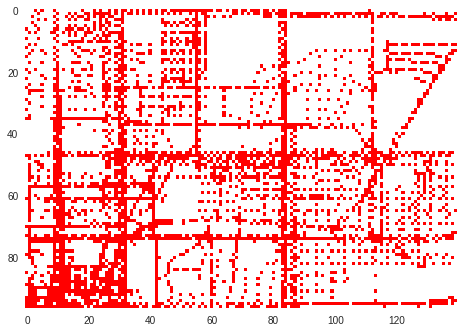

In [26]:
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap


colors = [(1, 1, 1), (1, 0, 0)]  
cmap_name = 'n'
cm = LinearSegmentedColormap.from_list(
        cmap_name, colors, N=100)


d = [[1, 2, 3],[4, 5, 6],[7, 8, 9]]
ax = plt.gca()
im = ax.imshow(grid1, cmap = cm)

ax.grid(False)

plt.savefig("heatmap.png", dpi=500, quality = 95, facecolor='w', edgecolor='w',
        orientation='landscape', papertype=None, format=None,
        transparent=True, bbox_inches=None, pad_inches=0.1,
        frameon=None, metadata=None)
files.download("heatmap.png")

In [29]:
import json

d = []


for i in range(len(grid)):
  for j in range(len(grid[0])):
    l = {}
    l = {"latitude": corner_lat - i*resolution_lat,"longitude": corner_long + j*resolution_long, "crimeweight": grid[i][j], "lightweight": grid1[i][j] }
    d.append(l)

print(d)    

with open("lightdata.json", "w") as outfile:
    json.dump({"data": d}, outfile, indent = 4)
    
files.download("lightdata.json")

[{'latitude': 32.25, 'longitude': -110.969, 'crimeweight': 0.0, 'lightweight': 0.0}, {'latitude': 32.25, 'longitude': -110.9687, 'crimeweight': 0.0, 'lightweight': 0.0}, {'latitude': 32.25, 'longitude': -110.96839999999999, 'crimeweight': 0.0, 'lightweight': 0.0}, {'latitude': 32.25, 'longitude': -110.96809999999999, 'crimeweight': 0.0, 'lightweight': 1.0}, {'latitude': 32.25, 'longitude': -110.9678, 'crimeweight': 48.0, 'lightweight': 0.0}, {'latitude': 32.25, 'longitude': -110.9675, 'crimeweight': 64.0, 'lightweight': 1.0}, {'latitude': 32.25, 'longitude': -110.96719999999999, 'crimeweight': 48.0, 'lightweight': 0.0}, {'latitude': 32.25, 'longitude': -110.9669, 'crimeweight': 0.0, 'lightweight': 0.0}, {'latitude': 32.25, 'longitude': -110.9666, 'crimeweight': 0.0, 'lightweight': 0.0}, {'latitude': 32.25, 'longitude': -110.96629999999999, 'crimeweight': 0.0, 'lightweight': 1.0}, {'latitude': 32.25, 'longitude': -110.966, 'crimeweight': 3.0, 'lightweight': 0.0}, {'latitude': 32.25, 'lo